In [1]:
import numpy as np
import pandas as pd
import datetime
from src.cleaning_functions import *
from src.modelling_funcs import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [2]:
forex_pairs = pd.read_csv('./Output/forex_pairs.csv')
forex_pairs_sample = get_sample(forex_pairs, '2019-11-30 23:45:00', '2020-01-01 00:00:00')
forex_pairs = get_sample(forex_pairs, '2018-12-31 23:45:00','2020-01-01 00:00:00')

### Some plots to see

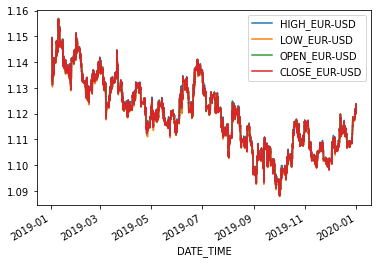

In [3]:
forex_pairs[['HIGH_EUR-USD','LOW_EUR-USD', 'OPEN_EUR-USD', 'CLOSE_EUR-USD']].plot()

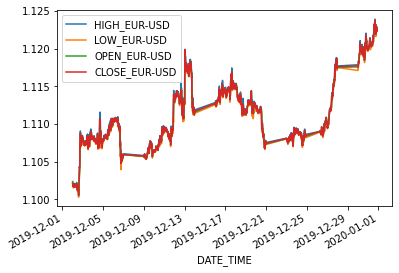

In [4]:
# December
forex_pairs_sample[['HIGH_EUR-USD','LOW_EUR-USD', 'OPEN_EUR-USD', 'CLOSE_EUR-USD']].plot()

<ipython-input-5-23cca422d4fd>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  first_plt = sm.tsa.seasonal_decompose(forex_pairs["CLOSE_EUR-USD"], freq= 5000)


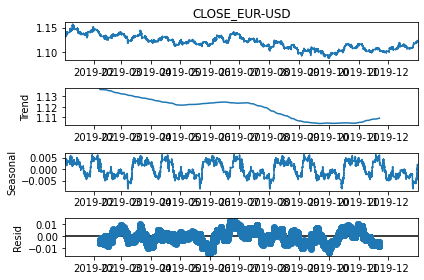

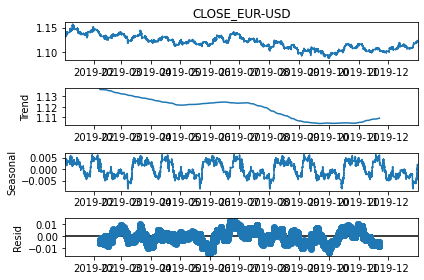

In [5]:
# Closest freq to our dataset
first_plt = sm.tsa.seasonal_decompose(forex_pairs["CLOSE_EUR-USD"], freq= 5000)
first_plt.plot()

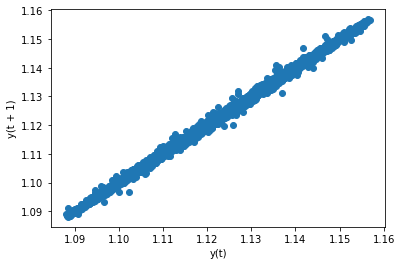

In [6]:
pd.plotting.lag_plot(forex_pairs['CLOSE_EUR-USD'])

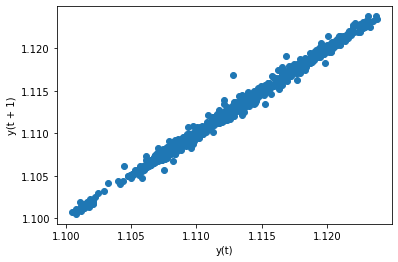

In [7]:
pd.plotting.lag_plot(forex_pairs_sample['CLOSE_EUR-USD'])

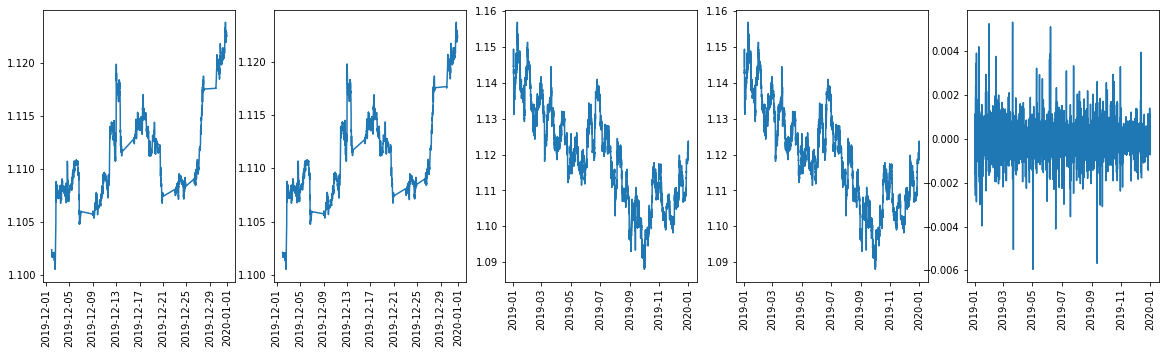

In [8]:


plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.plot(forex_pairs_sample[["OPEN_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,5,2)
plt.plot(forex_pairs_sample[["CLOSE_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,5,3)
plt.plot(forex_pairs[["OPEN_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,5,4)
plt.plot(forex_pairs[["CLOSE_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,5,5)
plt.plot(forex_pairs[["DIFF_EUR-USD"]])
plt.xticks(rotation=90)

#plt.xticks(range(0,168,7),list(m),rotation=90)
plt.show()

In [9]:
#Case only December 2019
#stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"
#[(col,stationaryCheck(forex_pairs[col])) for col in forex_pairs.columns]

#I compiled in this function below
stationary_or_not(forex_pairs_sample)

[('HIGH_EUR-USD', 'Not-Stationary'),
 ('LOW_EUR-USD', 'Not-Stationary'),
 ('OPEN_EUR-USD', 'Not-Stationary'),
 ('CLOSE_EUR-USD', 'Not-Stationary'),
 ('DIFF_EUR-USD', 'Stationary'),
 ('HIGH_EUR-JPY', 'Not-Stationary'),
 ('LOW_EUR-JPY', 'Not-Stationary'),
 ('OPEN_EUR-JPY', 'Not-Stationary'),
 ('CLOSE_EUR-JPY', 'Not-Stationary'),
 ('DIFF_EUR-JPY', 'Stationary'),
 ('HIGH_USD-JPY', 'Not-Stationary'),
 ('LOW_USD-JPY', 'Not-Stationary'),
 ('OPEN_USD-JPY', 'Not-Stationary'),
 ('CLOSE_USD-JPY', 'Not-Stationary'),
 ('DIFF_USD-JPY', 'Stationary'),
 ('HIGH_EUR-CHF', 'Not-Stationary'),
 ('LOW_EUR-CHF', 'Not-Stationary'),
 ('OPEN_EUR-CHF', 'Not-Stationary'),
 ('CLOSE_EUR-CHF', 'Not-Stationary'),
 ('DIFF_EUR-CHF', 'Stationary'),
 ('HIGH_USD-CAD', 'Not-Stationary'),
 ('LOW_USD-CAD', 'Not-Stationary'),
 ('OPEN_USD-CAD', 'Not-Stationary'),
 ('CLOSE_USD-CAD', 'Not-Stationary'),
 ('DIFF_USD-CAD', 'Stationary'),
 ('HIGH_USD-CHF', 'Not-Stationary'),
 ('LOW_USD-CHF', 'Not-Stationary'),
 ('OPEN_USD-CHF', 'Not

In [10]:
#Case all 2019
# I let this commented because gets the same results as the upper case
#stationary_or_not(forex_pairs)

#### p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

## Modelling

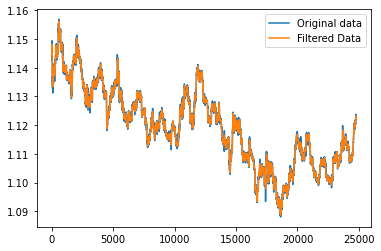

In [11]:

from scipy import signal

data_close = forex_pairs['CLOSE_EUR-USD']

b, a = signal.butter(3, 1/10)
filtrd_data_close = signal.filtfilt(b, a, data_close)

plt.plot(data_close.to_numpy())
plt.plot(filtrd_data_close)
plt.legend(["Original data","Filtered Data"])

In [12]:
df = pd.DataFrame({
    "X":data_close.to_numpy(),
    "Xf": filtrd_data_close
},index=forex_pairs.index)

dr = df.index
print(dr, dr.shape)
realidad = df.loc[dr[:22808]]
futuro = df.loc[dr[22808:]]

DatetimeIndex(['2019-01-02 06:00:00', '2019-01-02 06:15:00',
               '2019-01-02 06:30:00', '2019-01-02 06:45:00',
               '2019-01-02 07:00:00', '2019-01-02 07:15:00',
               '2019-01-02 07:30:00', '2019-01-02 07:45:00',
               '2019-01-02 08:00:00', '2019-01-02 08:15:00',
               ...
               '2019-12-31 18:30:00', '2019-12-31 18:45:00',
               '2019-12-31 19:00:00', '2019-12-31 19:15:00',
               '2019-12-31 19:30:00', '2019-12-31 19:45:00',
               '2019-12-31 20:00:00', '2019-12-31 20:15:00',
               '2019-12-31 20:30:00', '2019-12-31 20:45:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=24776, freq=None) (24776,)


In [13]:
print(forex_pairs_sample.shape, forex_pairs.shape)
df

(1968, 35) (24776, 35)


,X,Xf
DATE_TIME,,
2019-01-02 06:00:00,1.14443,1.144483
2019-01-02 06:15:00,1.14445,1.144945
2019-01-02 06:30:00,1.14460,1.145413
2019-01-02 06:45:00,1.14449,1.145886
2019-01-02 07:00:00,1.14480,1.146354
...,...,...
2019-12-31 19:45:00,1.12288,1.122458
2019-12-31 20:00:00,1.12247,1.122434
2019-12-31 20:15:00,1.12242,1.122400


In [14]:
#We start with the AR Model

predictions_AR = dict()

for col in realidad.columns:
    train = realidad[col]
    test = futuro[col]
    #train y test retornan la serie de Xf
    # Entrena el modelo AR
    model_AR = AR(train)
    print(f"Entrenando con los datos desde la serie {col}")
    model_fit_AR = model_AR.fit(maxlag=4)
    
     # Predice los valores AR
    predictions_AR[f'{col}_prediction'] = model_fit_AR.predict(start=len(train),
                                    end=len(train)+len(test)-1, dynamic=False)
      
pred_AR = pd.DataFrame(predictions_AR)
pred_AR.index = futuro.index
pred_AR

Entrenando con los datos desde la serie X
Entrenando con los datos desde la serie Xf


/home/pablo/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)

,X_prediction,Xf_prediction
DATE_TIME,,
2019-12-02 00:00:00,1.102014,1.101884
2019-12-02 00:15:00,1.102020,1.101900
2019-12-02 00:30:00,1.102026,1.101906
2019-12-02 00:45:00,1.102031,1.101901
2019-12-02 01:00:00,1.102037,1.101885
...,...,...
2019-12-31 19:45:00,1.109538,1.118913
2019-12-31 20:00:00,1.109541,1.118913
2019-12-31 20:15:00,1.109543,1.118914


In [39]:
AR_predictions = pd.DataFrame({
    "GT":futuro.X,
    "X":pred_AR.X_prediction,
    "Xf":pred_AR.Xf_prediction,
},index=futuro.index)


AR_predictions

,GT,X,Xf
DATE_TIME,,,
2019-12-02 00:00:00,1.10208,1.102014,1.101884
2019-12-02 00:15:00,1.10204,1.102020,1.101900
2019-12-02 00:30:00,1.10209,1.102026,1.101906
2019-12-02 00:45:00,1.10206,1.102031,1.101901
2019-12-02 01:00:00,1.10182,1.102037,1.101885
...,...,...,...
2019-12-31 19:45:00,1.12288,1.109538,1.118913
2019-12-31 20:00:00,1.12247,1.109541,1.118913
2019-12-31 20:15:00,1.12242,1.109543,1.118914


<Figure size 1728x864 with 0 Axes>

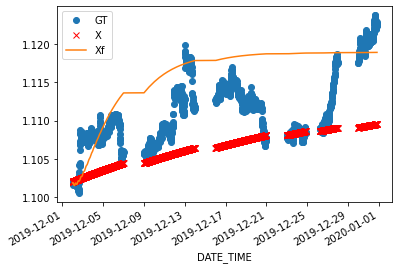

In [40]:
plt.figure(figsize=(24,12))
AR_predictions.iloc[:-2].plot(style=['o','rx'])

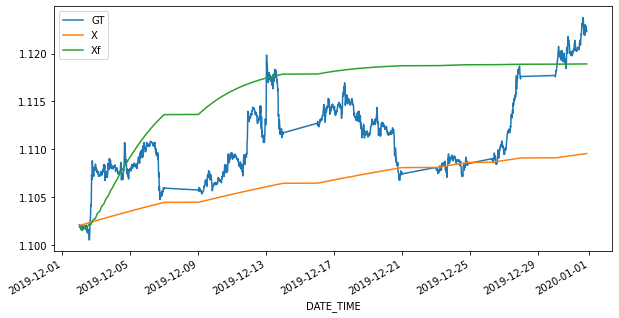

In [43]:
AR_predictions.plot(figsize=(10,5))
plt.savefig('./Output/AR_pred.png')

In [16]:
#We get the metrics from our AR Model
for col in futuro.columns:
    mse = mean_squared_error(futuro[col], AR_predictions[col])
    rmse = np.sqrt(mse)
    print(f"AR Model {col} ->  MSE={mse} RMSE={rmse}")

AR Model X ->  MSE=3.627733276329428e-05 RMSE=0.0060230667241276915
AR Model Xf ->  MSE=3.614101692169201e-05 RMSE=0.006011739924655092


In [50]:
get_metrics(AR_predictions, )

TypeError: get_metrics() missing 2 required positional arguments: 'df_orig' and 'name'

In [17]:
predictions_ARIMA = dict()

for col in realidad.columns:
    train = realidad[col]
    test = futuro[col]

    # Entrena el modelo AR
    model_ARIMA = ARIMA(train, order=(0,0,1))
    print(f"Entrenando con los datos desde a serie {col}")
    model_fit_ARIMA = model_ARIMA.fit(maxlag=4)
    
     # Predice los valores AR
    predictions_ARIMA[f'{col}_prediction'] = model_fit_ARIMA.predict(start=len(train),
                                    end=len(train)+len(test)-1, dynamic=False)
      
pred_ARIMA = pd.DataFrame(predictions_ARIMA)
pred_ARIMA.index = futuro.index

pred_ARIMA

Entrenando con los datos desde a serie X


/home/pablo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/pablo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/home/pablo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Entrenando con los datos desde a serie Xf


/home/pablo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,X_prediction,Xf_prediction
DATE_TIME,,
2019-12-02 00:00:00,1.111641,1.111058
2019-12-02 00:15:00,1.120244,1.120244
2019-12-02 00:30:00,1.120244,1.120244
2019-12-02 00:45:00,1.120244,1.120244
2019-12-02 01:00:00,1.120244,1.120244
...,...,...
2019-12-31 19:45:00,1.120244,1.120244
2019-12-31 20:00:00,1.120244,1.120244
2019-12-31 20:15:00,1.120244,1.120244


In [45]:
ARIMA_predictions = pd.DataFrame({
    "GT":futuro.X,
    "X":pred_ARIMA.X_prediction,
    "Xf":pred_ARIMA.Xf_prediction,
},index=futuro.index)


ARIMA_predictions

,GT,X,Xf
DATE_TIME,,,
2019-12-02 00:00:00,1.10208,1.111641,1.111058
2019-12-02 00:15:00,1.10204,1.120244,1.120244
2019-12-02 00:30:00,1.10209,1.120244,1.120244
2019-12-02 00:45:00,1.10206,1.120244,1.120244
2019-12-02 01:00:00,1.10182,1.120244,1.120244
...,...,...,...
2019-12-31 19:45:00,1.12288,1.120244,1.120244
2019-12-31 20:00:00,1.12247,1.120244,1.120244
2019-12-31 20:15:00,1.12242,1.120244,1.120244


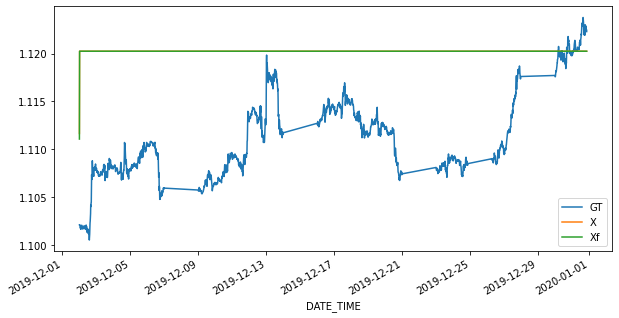

In [46]:
ARIMA_predictions.plot(figsize=(10,5))
plt.savefig('./Output/ARIMA_pred.png')

In [19]:
#MSE y RMSE Metrics
for col in futuro.columns:
    mse = mean_squared_error(futuro[col], ARIMA_predictions[col])
    rmse = np.sqrt(mse)
    print(f"ARIMA Model {col} ->  MSE={mse} RMSE={rmse}")

ARIMA Model X ->  MSE=0.00010259041786887566 RMSE=0.010128692801584795
ARIMA Model Xf ->  MSE=0.00010246371514721956 RMSE=0.010122436225890463


### LSTM Model

In [20]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, LSTM, Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
eur_usd = pd.read_csv('./Input/EURUSD-2000-2020-15m.csv')
eur_usd_LSTM = red_LSTM(eur_usd, 'EUR-USD', '2019-12-01 23:45:00','2020-01-01 00:00:00')

In [22]:
model_LSTM, model_e_u, X_test_e_u, y_test_e_u, y_scaler_e_u = modelling_LSTM(eur_usd_LSTM, 'EUR-USD',4)

Epoch 1/4
22293/22293 [==============================] - 90s 4ms/step - loss: 0.0028 - mae: 0.0305
Epoch 2/4
22293/22293 [==============================] - 94s 4ms/step - loss: 0.0011 - mae: 0.0223
Epoch 3/4
22293/22293 [==============================] - 98s 4ms/step - loss: 0.0010 - mae: 0.0221
Epoch 4/4
22293/22293 [==============================] - 96s 4ms/step - loss: 0.0010 - mae: 0.0218


In [23]:
pred = model_e_u.predict(X_test_e_u)
#plt.plot(model_eur_usd)
pred.shape

(2478, 4, 1)

In [24]:
prediction = np.reshape(pred, (2478, 4))
y_test = y_test_e_u.values.reshape(2483,1)
y_test.shape

(2483, 1)

In [25]:
prediction = pd.DataFrame(prediction)
prediction.iloc[0].sum()/len(prediction.iloc[0])

0.2549559473991394

In [26]:
predict = []
for i in range(len(prediction)):
        
        x = (prediction.iloc[i].sum())/(len(prediction.iloc[i]))
        predict.append(x)
        print(x)

0.2549559473991394
0.25574180483818054
0.2570081949234009
0.25587528944015503
0.253451406955719
0.24844816327095032
0.24141567945480347
0.23574408888816833
0.23225037753582
0.22739142179489136
0.22242271900177002
0.2199980765581131
0.21811428666114807
0.21779774129390717
0.21779094636440277
0.2171972692012787
0.2164320945739746
0.2146131694316864
0.21244940161705017
0.2119743525981903
0.21289217472076416
0.2130054235458374
0.21287065744400024
0.2115967869758606
0.2086440622806549
0.20608411729335785
0.20437511801719666
0.20479926466941833
0.20550283789634705
0.20674985647201538
0.20745961368083954
0.2070179581642151
0.20559954643249512
0.20430059731006622
0.2037169635295868
0.20400573313236237
0.20583507418632507
0.20647640526294708
0.2068125456571579
0.20669031143188477
0.20662473142147064
0.20708581805229187
0.20764592289924622
0.20799663662910461
0.2087082862854004
0.20900052785873413
0.2090146839618683
0.20921984314918518
0.20960091054439545
0.21013101935386658
0.2104664444923401
0

0.1889675259590149
0.18805959820747375
0.18771976232528687
0.18669664859771729
0.18620777130126953
0.18500050902366638
0.1831928938627243
0.1831963211297989
0.1833806186914444
0.18314070999622345
0.18183960020542145
0.18096044659614563
0.179576575756073
0.17681387066841125
0.17413495481014252
0.17212863266468048
0.17267388105392456
0.17187711596488953
0.1693437099456787
0.16444101929664612
0.15833497047424316
0.15800660848617554
0.16186970472335815
0.16426216065883636
0.16558778285980225
0.1677001416683197
0.17240750789642334
0.1790936291217804
0.1864537000656128
0.19474662840366364
0.2022264003753662
0.20599743723869324
0.20509813725948334
0.20325134694576263
0.20372599363327026
0.20405641198158264
0.20430821180343628
0.20466679334640503
0.2044820338487625
0.20407581329345703
0.20518991351127625
0.2058398425579071
0.20344389975070953
0.2012348175048828
0.20049014687538147
0.20051005482673645
0.20062004029750824
0.2005327343940735
0.20054379105567932
0.2005060911178589
0.20057086646556

0.32599079608917236
0.32740795612335205
0.3278409540653229
0.3279503881931305
0.32794809341430664
0.32809942960739136
0.32812491059303284
0.32782888412475586
0.32733768224716187
0.3270149230957031
0.32682865858078003
0.32680732011795044
0.32670822739601135
0.32653939723968506
0.3260689973831177
0.3254389762878418
0.32455572485923767
0.3233059346675873
0.32266566157341003
0.3227304518222809
0.3227442800998688
0.32258695363998413
0.32321783900260925
0.3240615129470825
0.32561856508255005
0.32668253779411316
0.32632941007614136
0.32521307468414307
0.32366761565208435
0.3207595944404602
0.31795552372932434
0.3160514235496521
0.31426653265953064
0.313960999250412
0.31317415833473206
0.3107469081878662
0.3089321553707123
0.30905288457870483
0.3090784549713135
0.3083617091178894
0.3074584901332855
0.30801886320114136
0.3081432580947876
0.30790847539901733
0.30581578612327576
0.30324339866638184
0.2987672686576843
0.28950685262680054
0.2832983136177063
0.27933377027511597
0.2761026620864868
0.

0.380343496799469
0.3757574260234833
0.37350529432296753
0.373898983001709
0.37524059414863586
0.3745978772640228
0.374854177236557
0.3756026327610016
0.3769162893295288
0.3767952024936676
0.37704718112945557
0.37883028388023376
0.3802826702594757
0.3814252018928528
0.3810845911502838
0.380708783864975
0.3810904324054718
0.3820696175098419
0.3823128640651703
0.3815833628177643
0.3805108964443207
0.379843533039093
0.3791443705558777
0.3781738579273224
0.3776456117630005
0.37769773602485657
0.3783015012741089
0.3790489137172699
0.37765511870384216
0.37592586874961853
0.3728753328323364
0.3710331618785858
0.37076759338378906
0.36926671862602234
0.36826014518737793
0.3686297535896301
0.3695247769355774
0.36996304988861084
0.3705981969833374
0.3715563416481018
0.3723890781402588
0.37283891439437866
0.37361910939216614
0.37515485286712646
0.3771878480911255
0.37891024351119995
0.38026103377342224
0.3814602792263031
0.3822650909423828
0.38262367248535156
0.3829286992549896
0.3828924894332886


0.2937125563621521
0.29372507333755493
0.2943512797355652
0.2940479516983032
0.2918531894683838
0.28860074281692505
0.2876031994819641
0.2876214385032654
0.2870137095451355
0.28548741340637207
0.28367334604263306
0.2822851240634918
0.28079599142074585
0.2805536091327667
0.28187310695648193
0.2854519188404083
0.2900283634662628
0.29207950830459595
0.29450851678848267
0.2964712977409363
0.29967522621154785
0.3029794991016388
0.3037341833114624
0.3032490015029907
0.3011208176612854
0.29987722635269165
0.301285982131958
0.302634596824646
0.3019409775733948
0.3011974096298218
0.30237066745758057
0.3036562204360962
0.3031127154827118
0.30232277512550354
0.30165591835975647
0.30208146572113037
0.30339735746383667
0.3050399422645569
0.3060590922832489
0.3070533573627472
0.30741453170776367
0.3074582815170288
0.30750685930252075
0.30685514211654663
0.3055551052093506
0.304274320602417
0.3030129671096802
0.30250412225723267
0.3014606535434723
0.30087900161743164
0.30116820335388184
0.30222547054

0.5071630477905273
0.5091139674186707
0.5113859176635742
0.5116769075393677
0.5076329112052917
0.5023762583732605
0.4967462420463562
0.49376440048217773
0.495187908411026
0.4962655305862427
0.49510669708251953
0.49340537190437317
0.49253031611442566
0.4943903386592865
0.49803170561790466
0.4985354244709015
0.4970763623714447
0.4975113272666931
0.49751925468444824


In [27]:
prediction['pred']= predict
prediction

,0,1,2,3,pred
0,0.258258,0.255725,0.253823,0.252017,0.254956
1,0.257722,0.257963,0.254796,0.252486,0.255742
2,0.261757,0.258521,0.255222,0.252533,0.257008
3,0.260421,0.258516,0.254954,0.249610,0.255875
4,0.261119,0.258235,0.251216,0.243236,0.253451
...,...,...,...,...,...
2473,0.498995,0.499579,0.497597,0.495956,0.498032
2474,0.502701,0.498909,0.496988,0.495544,0.498535
2475,0.498768,0.497509,0.496337,0.495691,0.497076
2476,0.499329,0.497561,0.496860,0.496294,0.497511


In [28]:
prediction_clean = prediction.drop(columns={0,1,2,3})
prediction_clean

,pred
0,0.254956
1,0.255742
2,0.257008
3,0.255875
4,0.253451
...,...
2473,0.498032
2474,0.498535
2475,0.497076
2476,0.497511


In [29]:
pred = y_scaler_e_u.inverse_transform(prediction_clean)
close = y_scaler_e_u.inverse_transform(y_test)
type(close)
predictions = pd.DataFrame()
predictions['predicted'] = pd.Series(np.reshape(pred, (pred.shape[0])))
predictions['GT'] = pd.Series(np.reshape(close, (close.shape[0])))
predictions

,predicted,GT
0,1.105584,1.10532
1,1.105638,1.10564
2,1.105725,1.10579
3,1.105647,1.10565
4,1.105480,1.10569
...,...,...
2473,1.122329,1.12301
2474,1.122364,1.12261
2475,1.122264,1.12262
2476,1.122294,1.12256


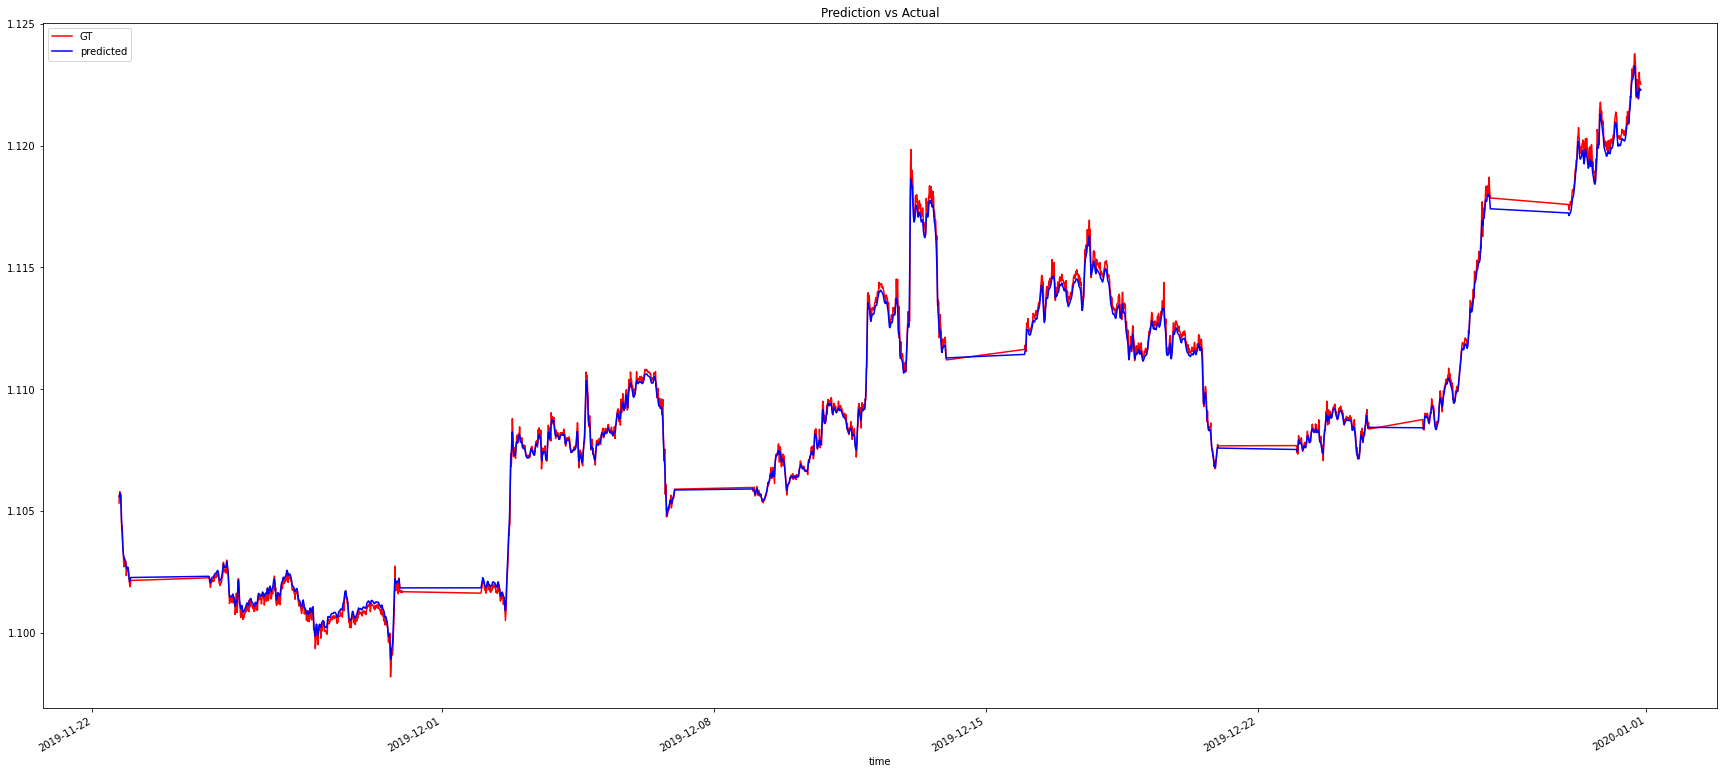

In [47]:

zoom = 2480

p = eur_usd_LSTM[-pred.shape[0]:].copy()
predictions.index = p.index
ax = predictions[:zoom].plot(y='GT', c='red', figsize=(30,14))
ax = predictions[:zoom].plot(y='predicted', c='blue', figsize=(30,14), ax=ax)
#ax = AR_predictions[:zoom].plot(y='Xf', c='green', figsize=(30,14), ax=ax)
#ax = ARIMA_predictions[:zoom].plot(y='Xf', c='yellow', figsize=(30,14), ax=ax)
index = [str(item) for item in predictions[:zoom].index]
#plt.fill_between(x=index, data=p[:zoom], alpha=0.4)
plt.title('Prediction vs Actual')
plt.show()
#plt.savefig('./Output/all_mod_vs_gt.png')

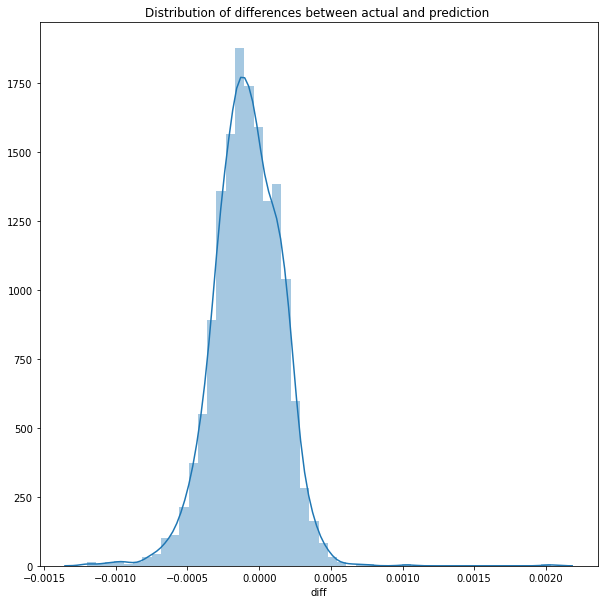

<Figure size 432x288 with 0 Axes>

In [48]:
predictions['diff'] = predictions['predicted'] - predictions['GT']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction ')
plt.show()
plt.savefig('./Output/dist_lstm.png')

In [32]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['GT'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['GT'].values))


MSE :  6.007233489449766e-08
MAE :  0.00019088951835750213


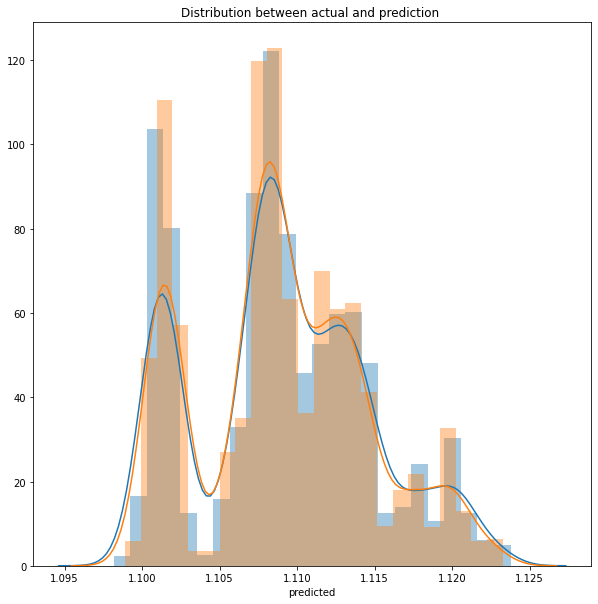

In [33]:
plt.figure(figsize=(10,10))
sns.distplot(predictions['GT']);
sns.distplot(predictions['predicted']);
plt.title('Distribution between actual and prediction ')
plt.show()